# HİDROJEN ATOMU

In [5]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import sph_harm # KÜRESEL HARMONİKLER İÇİN 
#BU HESAPTA HARTTRE BİRİM SİSTEMİNİ KULLANACAĞIZ
#Parametreler
r_max = 50.0       # Maksimum Bohr yarıçapı
N = 2000            # Grid noktası sayısı
dr = r_max / N      # Grid aralığı
l = 0               # Açısal momentum kuantum sayısı.s Ortibali için l=0 alıyoruz

# Radyal grid
r = np.linspace(dr, r_max, N)  # r=0 noktası tekillik oluşturacağından dahil etmiyoruz



# Harttre birim sisteminde 

$$ \Huge \frac{e^2}{4 \pi \varepsilon_0} = 1 $$ ℏ=1  ve  m=1



In [6]:
#Potansiyel enerji bu hali alır
V = -1.0 / r + l*(l+1) / (2 * r**2)



### Radyal Schrödinger Denklemi – Kinetik Enerji

Radyal Schrödinger denkleminin kinetik enerji kısmı:

$$ K = -\frac{1}{2} \frac{d^2}{dr^2}$$

İkinci türev, sonlu farklarla yaklaşık olarak şöyle yazılır:

$$\frac{d^2 u}{dr^2} \approx \frac{u_{i+1} - 2 u_i + u_{i-1}}{(dr)^2}$$

u_i=Ana Nokta

u_i-1,u_i+1 Komşu Noktalar




$$
-\frac{1}{2}\frac{d^2u}{dr^2} - \frac{1}{r} u = E u
$$
$$
d_i = \frac{1}{(\Delta r)^2} + V(r_i), \quad
o_i = -\frac{1}{2(\Delta r)^2}, \quad
V(r_i) = -\frac{1}{r_i} + \frac{l(l+1)}{2 r_i^2}
$$

In [7]:
 #Kinetik enerji matrisi (sonlu farklar yöntemi)
diag = 1.0 / dr**2 + V #Ana diagonal u_i'den gelen terim
off_diag = -0.5/dr**2 * np.ones(N-1)#Yan diagonal komşu noktalardan gelen terim

# Hamilton matrisi
H = np.diag(diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# Eigen değer ve eigen vektörleri
eigvals, eigvecs = np.linalg.eigh(H)

# İlk birkaç enerji seviyesini al
max_enerji_seviyesi = 6
nümerik_enerji = eigvals[:max_enerji_seviyesi]

# Analitik enerji seviyeleri (Hartree)
n_list = np.arange(1, max_enerji_seviyesi+1)
analitik_enerji = -1.0 / (2.0 * n_list**2)

# Hartree'den eV'ye dönüşüm
hartree_to_ev = 27.2114
nümerik_enerji_ev = nümerik_enerji * hartree_to_ev
analitik_enerji_ev = analitik_enerji * hartree_to_ev
df = pd.DataFrame({
    'n (analytic)': n_list,
    'E_analytic (eV)': analitik_enerji_ev,
    'E_numeric (eV)': nümerik_enerji_ev
})
print(df)


   n (analytic)  E_analytic (eV)  E_numeric (eV)
0             1       -13.605700      -13.603575
1             2        -3.401425       -3.401292
2             3        -1.511744       -1.511718
3             4        -0.850356       -0.849115
4             5        -0.544228       -0.486342
5             6        -0.377936       -0.062396


# GRAFİK İÇİN GEREKLİ OLANLAR


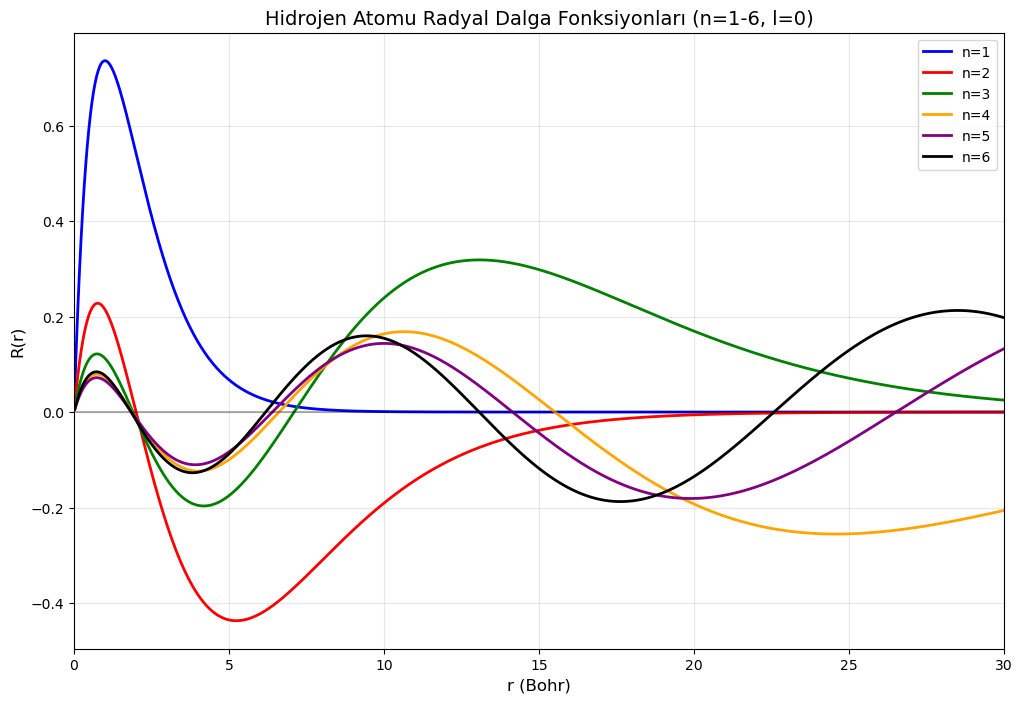

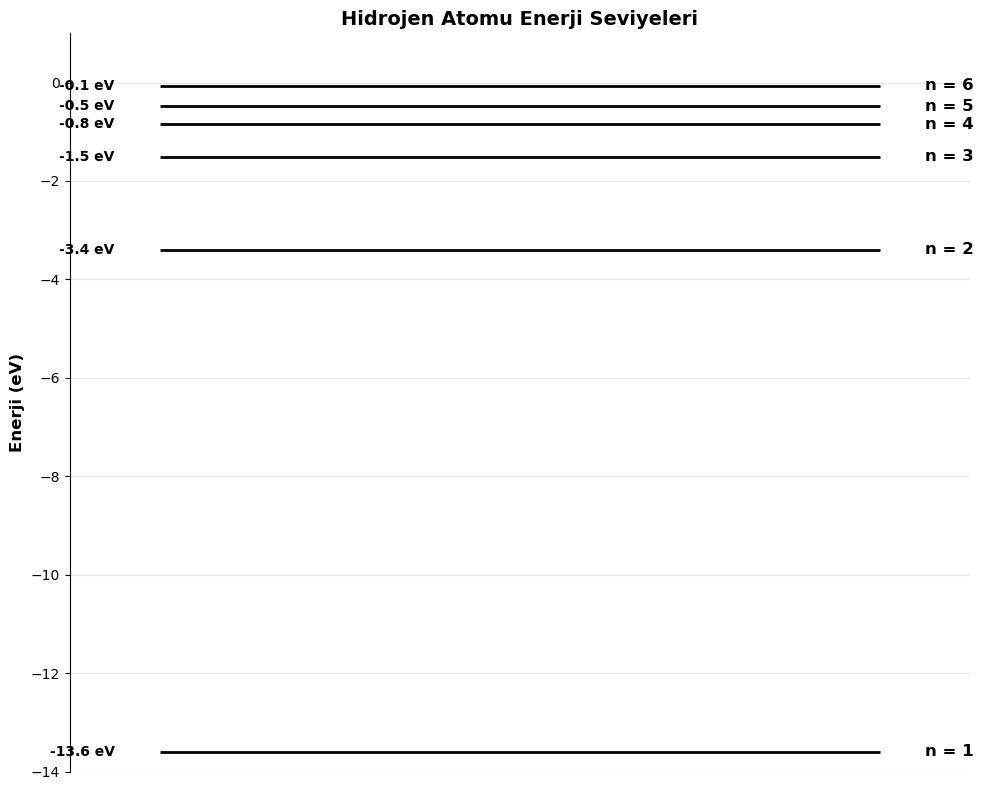

In [8]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']#Grafikteki eğrilerin renkleri

for i in range(max_enerji_seviyesi):
    # Dalga fonksiyonunu normalizasyonu
    psi = eigvecs[:, i]#Dalga Fonksiyonu
    norm = np.sqrt(np.trapezoid(psi**2, r))
    psi_normalized = psi / norm
    
    # Tüm dalga fonksiyonlarının +y ekseninden başlamasını sağla
    if psi_normalized[0] < 0:
        psi_normalized = -psi_normalized
    
    plt.plot(r, psi_normalized, color=colors[i], linewidth=2, 
             label=f'n={i+1}')
plt.xlabel('r (Bohr)', fontsize=12)
plt.ylabel('R(r)', fontsize=12)
plt.title('Hidrojen Atomu Radyal Dalga Fonksiyonları (n=1-6, l=0)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 30)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.show()

# GRAFİK 2: ENERJİ SEVİYELERİ DİYAGRAMI 
plt.figure(figsize=(10, 8))

# Enerji seviyelerini çiz
for i in range(max_enerji_seviyesi):
    energy = nümerik_enerji_ev[i]
    
    # Yatay çizgi (enerji seviyesi)
    plt.hlines(y=energy, xmin=0.1, xmax=0.9, color='black', linewidth=2)
    
    # Enerji değerini sol tarafa yaz
    plt.text(0.05, energy, f'{energy:.1f} eV', ha='right', va='center', 
             fontsize=10, fontweight='bold')
    
    # Kuantum sayısını sağ tarafa yaz
    plt.text(0.95, energy, f'n = {i+1}', ha='left', va='center', 
             fontsize=12, fontweight='bold')

# Eksenleri düzenleme
plt.xlim(0, 1)
plt.ylim(-14, 1)
plt.xlabel('')
plt.ylabel('Enerji (eV)', fontsize=12, fontweight='bold')
plt.title('Hidrojen Atomu Enerji Seviyeleri', fontsize=14, fontweight='bold')

# Eksen çizgilerini kaldırma
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_xticks([])

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

   

# RADYAL DALGA FONKSİYONU ve BULUNMA OLASILIĞI



# Hidrojen Atomunda Bulunma Olasılığı (0 ile $2a_0$ Arası)
## Radyal Dalga Fonksiyonunun Normalizasyonu
$$R_{n,l}(r) = \sqrt{\left(\frac{2Z}{na_0}\right)^3 \frac{(n-l-1)!}{2n(n+l)!}} \cdot e^{-\rho/2} \cdot \rho^l \cdot L_{n-l-1}^{2l+1}(\rho) $$Burada: * **$n, l$** baş ve açısal momentum kuantum sayılarıdır. * **$Z$** atom numarasıdır. * **$a_0$** Bohr yarıçapıdır ($a_0 = \frac{4\pi\epsilon_0\hbar^2}{m_e e^2}$). * **$L_{n-l-1}^{2l+1}(\rho)$** İlişkili Laguerre Polinomlarıdır.
$$
Normalizasyon koşulu, parçacığı tüm uzayda ($r=0$ ile $r=\infty$ arası) bulma olasılığının 1 olmasıdır.

Bu olasılık, radyal olasılık yoğunluğu $P(r) = |R_{n,l}(r)|^2 r^2$ üzerinden hesaplanır.

Normalizasyon şartı şudur:

$$
\int_{0}^{\infty} |R_{n,l}(r)|^2 r^2 dr = 1
$$
## Genel Formül

Bir elektronun $r_1$ ve $r_2$ yarıçapları arasında (tüm açılar üzerinden) bulunma olasılığı $P$, radyal dalga fonksiyonu $R_{n,l}(r)$ kullanılarak hesaplanır. Bu olasılık, radyal olasılık yoğunluğu $P(r) = |R_{n,l}(r)|^2 r^2$ fonksiyonunun integralidir:

$$
P(r_1 \le r \le r_2) = \int_{r_1}^{r_2} |R_{n,l}(r)|^2 r^2 \, dr
$$

Bizim durumumuzda $r_1 = 0$ ve $r_2 = 2a_0$. (Hesaplamalarda $a_0=1$ atomik birimi kullanılmıştır).

---

## 1. 1s Orbitali ($n=1, l=0$)
$$
R_{1,0}(r) = 2 \left(\frac{1}{a_0}\right)^{3/2} e^{-r/a_0}
$$
1s orbitali için normalize edilmiş radyal dalga fonksiyonu (Z=1, $a_0=1$):
$$
R_{1,0}(r) = 2 e^{-r}
$$

Bulunma olasılığı integrali:
$$
P_{1s} = 4 \int_0^2 r^2 e^{-2r} \, dr
$$

Bu integralin analitik çözümü:
$$
P_{1s} = 1 - 13e^{-4} \approx 0.7619
$$

---

## 2. 2p Orbitali ($n=2, l=1$)
$$
R_{2,1}(r) = \frac{1}{2\sqrt{6}} \left(\frac{1}{a_0}\right)^{3/2} \left(\frac{r}{a_0}\right) e^{-r/2a_0}
$$
2p orbitali için normalize edilmiş radyal dalga fonksiyonu (Z=1, $a_0=1$):
$$
R_{2,1}(r) = \frac{1}{2\sqrt{6}} r e^{-r/2}
$$

Bulunma olasılığı integrali:
$$
P_{2p} = \int_0^2 \left( \frac{1}{2\sqrt{6}} r e^{-r/2} \right)^2 r^2 \, dr = \frac{1}{24} \int_0^2 r^4 e^{-r} \, dr
$$

$$
P_{2p} \approx 0.0527
$$


---

## 3. 3s Orbitali ($n=3, l=0$)
$$
R_{3,0}(r) = \frac{2}{3\sqrt{3}} \left(\frac{1}{a_0}\right)^{3/2} \left(1 - \frac{2r}{3a_0} + \frac{2r^2}{27a_0^2}\right) e^{-r/3a_0}
$$

3s orbitali için normalize edilmiş radyal dalga fonksiyonu (Z=1, $a_0=1$):
$$
R_{3,0}(r) = \frac{2}{81\sqrt{3}} (27 - 18r + 2r^2) e^{-r/3}
$$

Bulunma olasılığı integrali:
$$
P_{3s} = \int_0^2 \left[ \frac{2}{81\sqrt{3}} (27 - 18r + 2r^2) e^{-r/3} \right]^2 r^2 \, dr
$$

Bu karmaşık integral sayısal olarak çözüldüğünde:
$$
P_{3s} \approx 0.0144
$$

In [12]:

# Hesaplamaları atomik birimlerde yapacağız (a_0 = 1, Z = 1)

# ---- 1. Radyal Dalga Fonksiyonlarının Tanımlanması (R_n,l) ----
# Z = 1 (Hidrojen) ve a_0 = 1 için

def R_1s(r):
    # n=1, l=0
    return 2 * np.exp(-r)

def R_2p(r):
    # n=2, l=1
    return (1.0 / (2.0 * np.sqrt(6.0))) * r * np.exp(-r / 2.0)

def R_3s(r):
    # n=3, l=0
    return (2.0 / (81.0 * np.sqrt(3.0))) * (27.0 - 18.0*r + 2.0*r**2) * np.exp(-r / 3.0)

# ---- 2. İntegrali Alınacak Fonksiyonların Tanımlanması (P(r) = r^2 * |R(r)|^2) ----

def beklenen_değer_1s(r):
    R = R_1s(r)
    return (R**2) * (r**2)

def beklenen_değer_2p(r):
    R = R_2p(r)
    return (R**2) * (r**2)

def beklenen_değer_3s(r):
    R = R_3s(r)
    return (R**2) * (r**2)

# ---- 3. İntegrasyon ve Sonuçlar ----

# İntegral sınırları (0'dan 2a_0'a kadar. a_0 = 1 aldık)
r_min = 0.0
r_max = 2.0

# 1s orbitali için hesaplama

beklenendeğer_1s, error_1s = quad(beklenen_değer_1s, r_min, r_max)

# 2p orbitali için hesaplama
beklenendeğer_2p, error_2p = quad(beklenen_değer_2p, r_min, r_max)

# 3s orbitali için hesaplama
beklenendeğer_3s, error_3s = quad(beklenen_değer_3s, r_min, r_max)

print("\n" + "="*50)
print("     0 İLE 2a_0 ARASINDA BULUNMA OLASILIKLARI")
print("="*50 + "\n")

print(f" -> 1s ORBİTALİ: {beklenendeğer_1s:.5f}  (YAKLAŞIK % {beklenendeğer_1s*100:.2f})")
print("\n")
print(f" -> 2p ORBİTALİ: {beklenendeğer_2p:.5f}  (YAKLAŞIK % {beklenendeğer_2p*100:.2f})")
print("\n")
print(f" -> 3s ORBİTALİ: {beklenendeğer_3s:.5f}  (YAKLAŞIK % {beklenendeğer_3s*100:.2f})")
print("\n" + "="*50)


     0 İLE 2a_0 ARASINDA BULUNMA OLASILIKLARI

 -> 1s ORBİTALİ: 0.76190  (YAKLAŞIK % 76.19)


 -> 2p ORBİTALİ: 0.05265  (YAKLAŞIK % 5.27)


 -> 3s ORBİTALİ: 0.01435  (YAKLAŞIK % 1.44)



# KÜRESEL HARMONİKLER


$$\psi(r, \theta, \phi) = R(r) Y_l^m(\theta, \phi)$$ Burada $Y_l^m(\theta, \phi)$ bizim ilgileneceğimiz küresel kısım.

$$Y_l^m(\theta, \phi) = N \cdot P_l^m(\cos\theta) \cdot e^{im\phi}$$ Bu denklem Küresel Harmoniklerin genelleştirilmiş denklemidir.N=Normalizasyon sabiti


--- Küresel Harmonik (Orbital Şekilleri) Grafikleri (s, p, d) ---


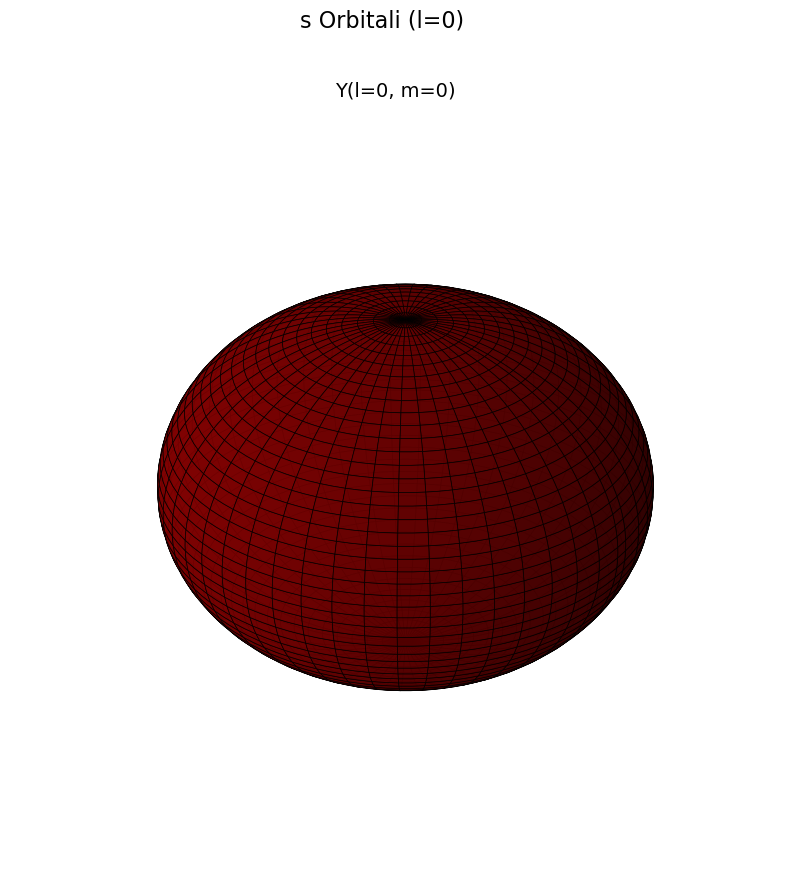

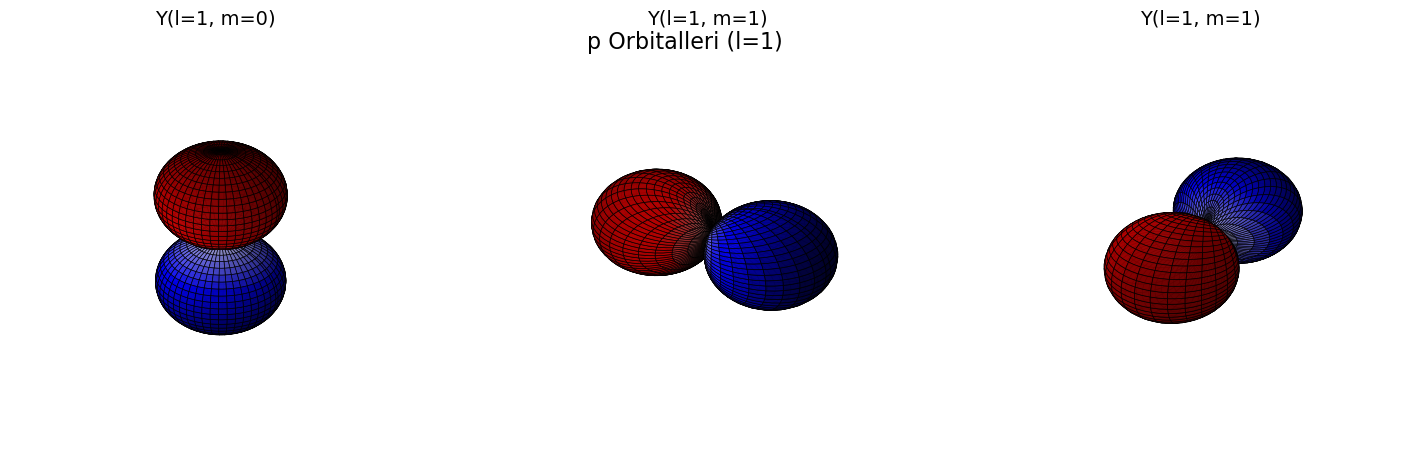

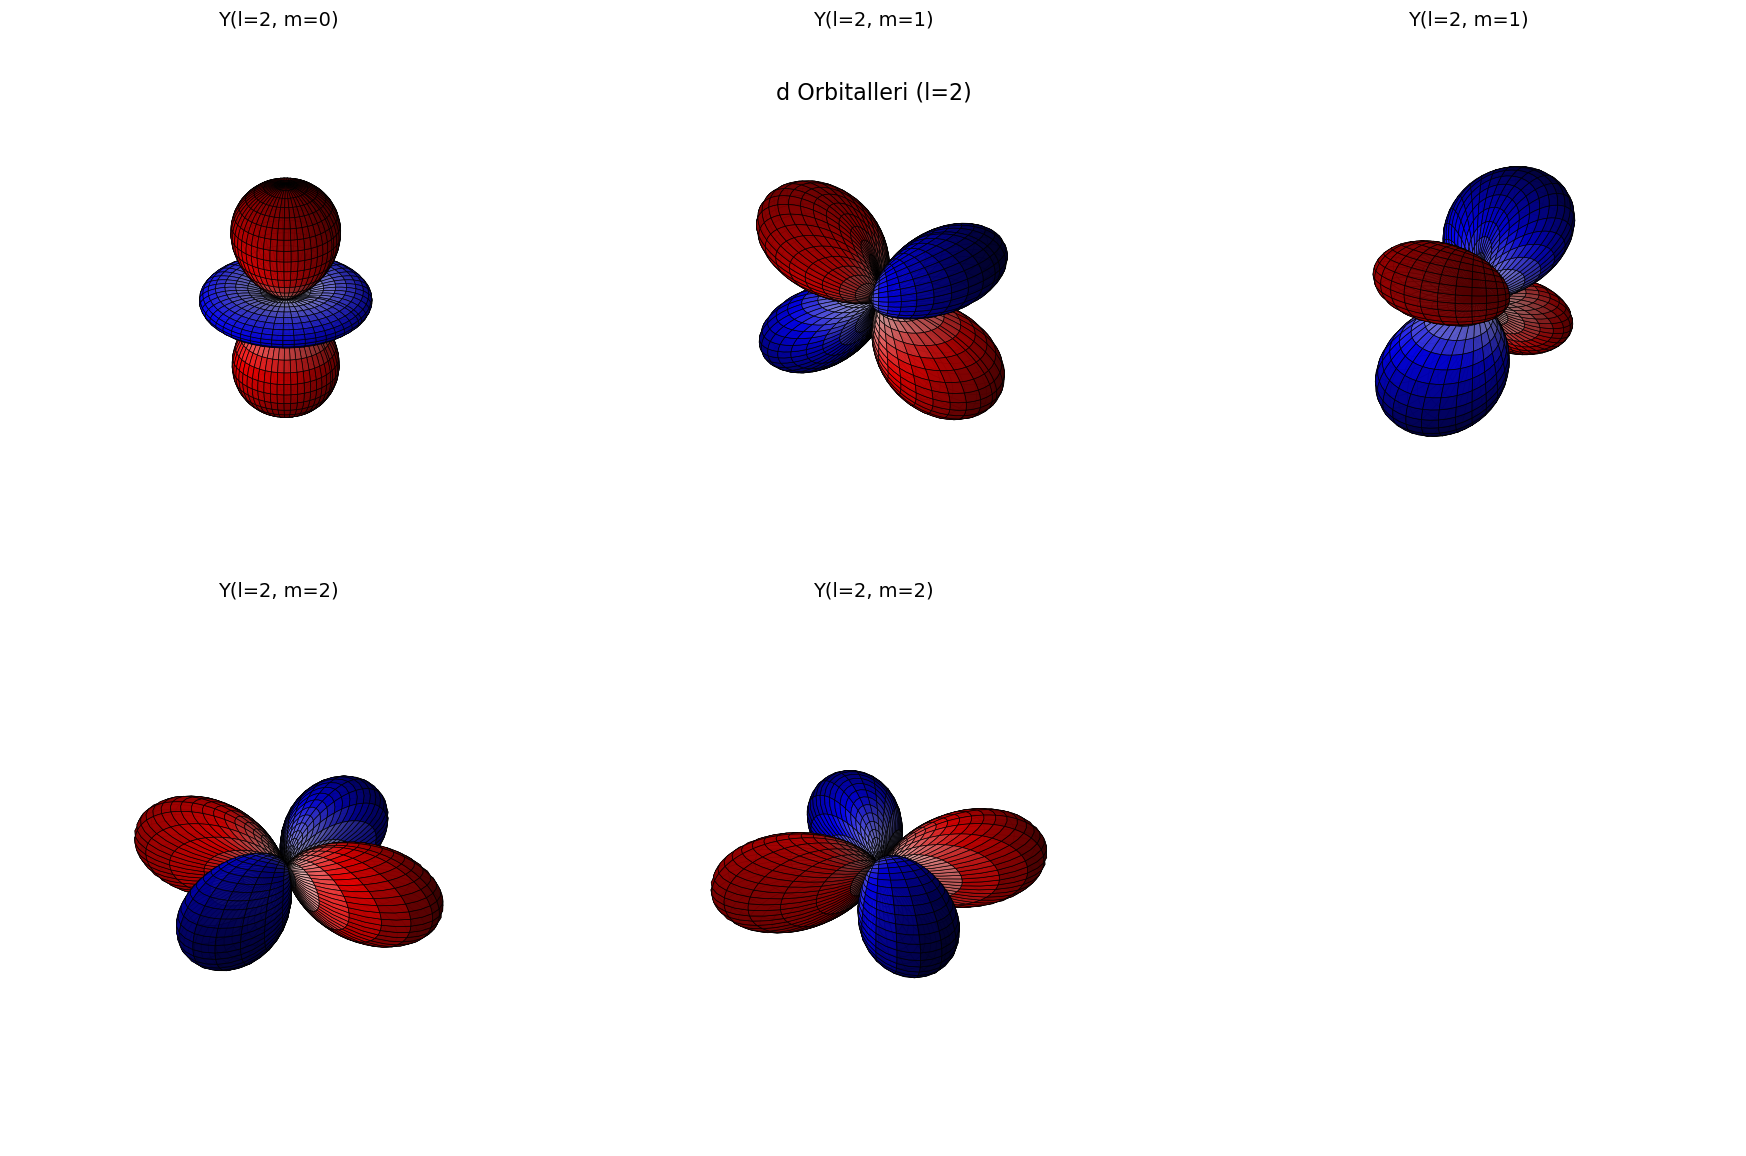

In [28]:
# ##########################################################################
# --- KÜRESEL HARMONİK - AÇISAL KISIM ---
# ##########################################################################

print("\n" + "="*50)
print("--- Küresel Harmonik (Orbital Şekilleri) Grafikleri (s, p, d) ---")
print("="*50)


def plot_spherical_harmonic_on_ax(ax, l, m, plot_part='real'):
    """
    Belirtilen 'ax' (matplotlib 3D ekseni) üzerine, 
    verilen l ve m değerleri için küresel harmoniği çizer.
    Başlıklar otomatik olarak Y(l=..., m=...) formatında oluşturulur.
    """
    
    # 1. Küresel koordinat ızgarası
    N = 100 
    theta = np.linspace(0, np.pi, N)
    phi = np.linspace(0, 2 * np.pi, N)
    theta, phi = np.meshgrid(theta, phi)

    # 2. Küresel Harmonik Fonksiyonu
    # (scipy sırası: m, l, phi, theta)
    Y_lm = sph_harm(m, l, phi, theta)

    # 3. Gerçel (real) veya İmajiner (imag) kısmı seç
    if plot_part == 'real':
        data_to_plot = Y_lm.real
    elif plot_part == 'imag':
        data_to_plot = Y_lm.imag
    else: # 'abs' (mutlak değer)
        data_to_plot = np.abs(Y_lm)

    # 4. Yarıçapı ve Kartezyen Koordinatları Hesapla
    R = np.abs(data_to_plot)
    X = R * np.sin(theta) * np.cos(phi)
    Y = R * np.sin(theta) * np.sin(phi)
    Z = R * np.cos(theta) 

    # 5. Renkleri ayarla (Fonksiyonun pozitif/negatif fazına göre)
    fmax = np.max(np.abs(data_to_plot))
    if fmax < 1e-9: fmax = 1.0
    colors = plt.cm.seismic(data_to_plot / fmax * 0.5 + 0.5) 

    # 6. Belirtilen 'ax' üzerine yüzeyi çiz
    ax.plot_surface(X, Y, Z, 
                    facecolors=colors, 
                    rstride=2, 
                    cstride=2,
                    alpha=0.9,
                    linewidth=0.5,
                    edgecolor='k')

    # 7. Alt-grafiğin başlığını ve limitlerini ayarla
    title = f"Y(l={l}, m={m})"
    ax.set_title(title, fontsize=14, pad=10)
    
    max_val = np.max(R)
    if max_val < 0.1: max_val = 0.5
        
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    ax.set_axis_off() 

# --- GRAFİK 3: l=0 (s orbitali) ---
fig_s = plt.figure(figsize=(10, 10))
ax_s = fig_s.add_subplot(111, projection='3d')
plot_spherical_harmonic_on_ax(ax_s, l=0, m=0, plot_part='real') 
fig_s.suptitle("s Orbitali (l=0)", fontsize=16)

# --- GRAFİK 4: l=1 (p orbitalleri) ---
fig_p = plt.figure(figsize=(18, 6))
fig_p.suptitle("p Orbitalleri (l=1)", fontsize=16, y=0.85)

# l=1, m=0, real
ax_p1 = fig_p.add_subplot(1, 3, 1, projection='3d')
plot_spherical_harmonic_on_ax(ax_p1, l=1, m=0, plot_part='real') 

# l=1, m=1, real
ax_p2 = fig_p.add_subplot(1, 3, 2, projection='3d')
plot_spherical_harmonic_on_ax(ax_p2, l=1, m=1, plot_part='real') 

# l=1, m=1, imag
ax_p3 = fig_p.add_subplot(1, 3, 3, projection='3d')
plot_spherical_harmonic_on_ax(ax_p3, l=1, m=1, plot_part='imag')

# --- GRAFİK 5: l=2 (d orbitalleri) ---
fig_d = plt.figure(figsize=(18, 12))
fig_d.suptitle("d Orbitalleri (l=2)", fontsize=16, y=0.9)

# l=2, m=0, real
ax_d1 = fig_d.add_subplot(2, 3, 1, projection='3d')
plot_spherical_harmonic_on_ax(ax_d1, l=2, m=0, plot_part='real')

# l=2, m=1, real
ax_d2 = fig_d.add_subplot(2, 3, 2, projection='3d')
plot_spherical_harmonic_on_ax(ax_d2, l=2, m=1, plot_part='real')

# l=2, m=1, imag
ax_d3 = fig_d.add_subplot(2, 3, 3, projection='3d')
plot_spherical_harmonic_on_ax(ax_d3, l=2, m=1, plot_part='imag')

# l=2, m=2, real
ax_d4 = fig_d.add_subplot(2, 3, 4, projection='3d')
plot_spherical_harmonic_on_ax(ax_d4, l=2, m=2, plot_part='real')

# l=2, m=2, imag
ax_d5 = fig_d.add_subplot(2, 3, 5, projection='3d')
plot_spherical_harmonic_on_ax(ax_d5, l=2, m=2, plot_part='imag')


# Tüm küresel harmonik grafiklerini göster
plt.tight_layout()
plt.show()


# TOPLAM DALGA FONKSİYONU